# ARC Tools
### Visuallize 2D torsion scan

#### input parameters:

In [ ]:
path = 'path/to/directed/scan/file.yml'

label = 'ethanol'
cmap = 'Blues'
cmap = 'RdBu_r'
resolution = 80

<IPython.core.display.Javascript object>


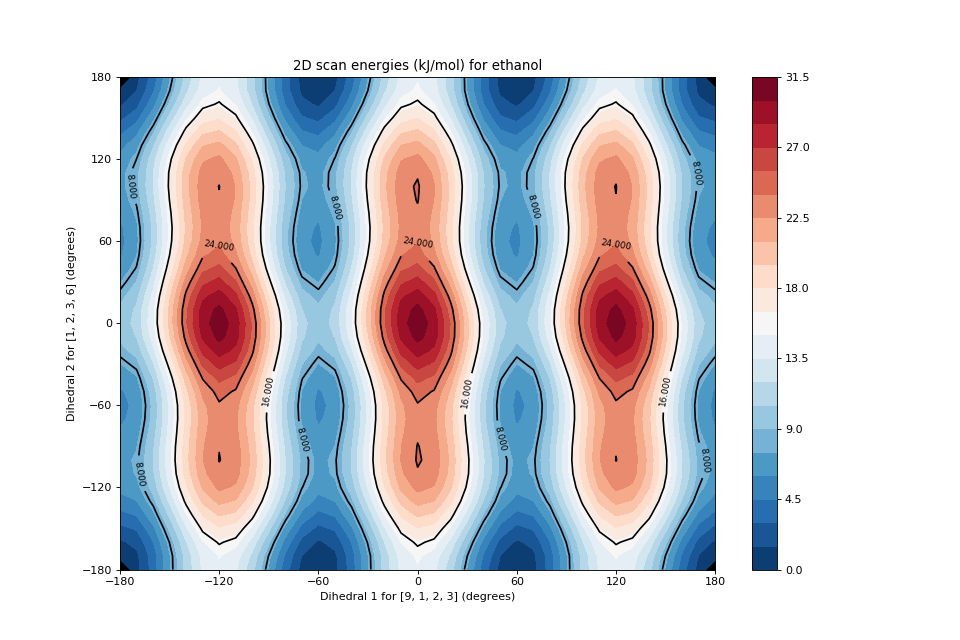

In [1]:
from arc.plotter import plot_2d_rotor_scan
from arc.common import read_yaml_file
from arc.plotter import draw_structure
from arc.species.converter import str_to_xyz
import numpy as np
%matplotlib notebook


content = read_yaml_file(path)
plot_2d_rotor_scan(content, path='/home/alongd/Code/ARC/Projects/directed_rotors/',
                   label=label, cmap=cmap, resolution=resolution)


Optional arguments for cmap::

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r,
GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired,
Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r,
PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r,
Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu,
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r,
bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r,
cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r,
gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot,
gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r,
rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r,
tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

#### Select dihedral combination to view the respective conformer:

In [ ]:
phi0 = 115.01
phi1 = -115.01


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

phis0 = np.array(sorted(list(set([float(key[0]) for key in content['directed_scan'].keys()]))), np.float64)
phis1 = np.array(sorted(list(set([float(key[1]) for key in content['directed_scan'].keys()]))), np.float64)

phi0 = find_nearest(phis0, phi0)
phi1 = find_nearest(phis1, phi1)

print(f'Showing the respective conformer for phi0 = {phi0}, phi1 = {phi1}')

xyz = str_to_xyz(content['directed_scan'][tuple(['{:.2f}'.format(phi0), '{:.2f}'.format(phi1)])]['xyz'])

draw_structure(xyz)